The final project of supervised machine learning
lecturere : Barnard Bart
student : Azadeh Pirzadeh

research question : The retrospective modelling and visualization of two years of the covid-19 pandemic

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno 
import seaborn as sns
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

In [28]:
#read the data
df=pd.read_csv('wellbeing_data_collection.csv')
#drop the Unnamed column
df=df.iloc[:,1:]
df.head()


,date,quality_of_life,age,Euro95(€/L),Diesel(€/L),Lpg(€/L),Open,High,Low,Close,...,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,counts_per_day,sunrise,sunset,daylight_hours,14day_rollling_avg_temp,14day_rollling_hospitalization
0,4/2/2020,8.000000,65.000000,1.486,1.237,0.568,473.980011,482.660004,468.119995,478.279999,...,NaN,NaN,NaN,NaN,1,7.066667,20.166667,13.100000,6.2000,2807.000000
1,4/6/2020,7.297588,54.378883,1.476,1.239,0.560,486.260010,491.679993,482.690002,489.820007,...,NaN,NaN,NaN,NaN,7340,6.900000,20.300000,13.400000,10.6000,2859.500000
2,4/7/2020,7.263230,55.309461,1.475,1.238,0.556,503.970001,508.559998,494.109985,499.850006,...,NaN,NaN,NaN,NaN,9914,6.866667,20.316667,13.450000,10.9500,2810.666667
3,4/8/2020,7.343911,55.432321,1.473,1.237,0.543,496.190002,500.709992,491.489990,500.709992,...,NaN,NaN,NaN,NaN,7543,6.833333,20.350000,13.516667,11.5375,2824.000000
4,4/9/2020,7.304743,55.732974,1.471,1.238,0.547,506.549988,511.929993,499.049988,508.040008,...,NaN,NaN,NaN,NaN,6857,6.783333,20.383333,13.600000,11.2600,2805.800000


The data set contains various columns.
date: the specific date that participants fill the questionnaire in lifelines
quality_of_life: the average quality of life of participants who filled out the questionnaire on that specific date.
age: the average of participants age who filled out the questionnaire on that specific date.
Euro95(€/L),Diesel(€/L),Lpg(€/L),Open,High,Low,Close,adj_close,Volume,rolling_mean_AEX: Finantial feature
news_sentiment : daily news sentiment index(social)
wind_gust,min_temp,avg_temp,max_temp,sunshine_duration,max_potential_sunshine_duration, precipitation_duration,
max_precipitation_amount,max_humidity,min_humidity,sunrise,sunset,daylight_hours,14day_rollling_avg_temp: weather feature
stringency index : composite measure based on nine response indicators including school closures, workplaceclosures,
and travel bans, rescaled to a value from 0 to 100 (100 = strictest)
icu_patients,daily_hospitalization,reproduction_rate,new_cases,new_deaths,total_cases,total_deaths,total_boosters,14day_rollling_hospitalization: hospitalitity features
counts_per_day : number of participants who filled out the questionnaire on that specific date

In [29]:
#check the type
print(df.dtypes)
df['date']=pd.to_datetime(df['date'])

date                                object
quality_of_life                    float64
age                                float64
Euro95(€/L)                        float64
Diesel(€/L)                        float64
Lpg(€/L)                           float64
Open                               float64
High                               float64
Low                                float64
Close                              float64
adj_close                          float64
Volume                             float64
Consumer_trust                     float64
Economic_climate                   float64
Buy_willingness                    float64
annual_rate_of_change              float64
annual_rate_of_change_derived      float64
rolling_mean_AEX                   float64
news_sentiment                     float64
wind_gust                            int64
min_temp                           float64
avg_temp                           float64
max_temp                           float64
sunshine_du

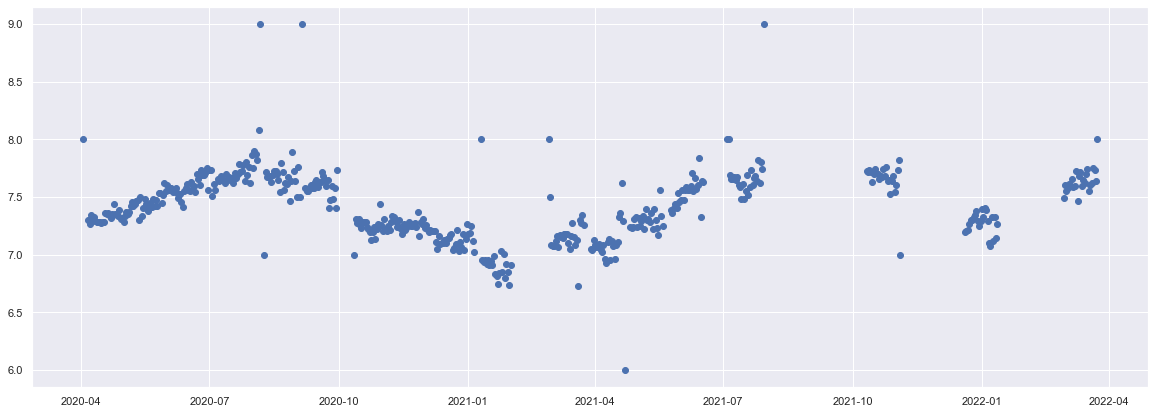

In [30]:
#plot of quality of life
plt.figure(figsize=(20,7))
plt.scatter(df['date'],df['quality_of_life'])
plt.show()

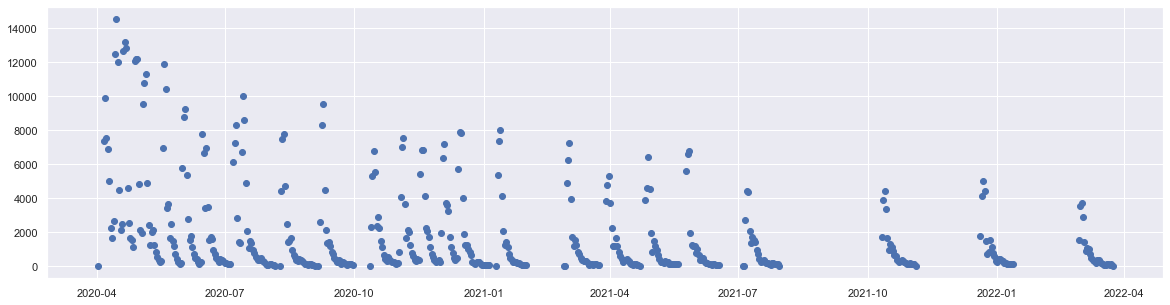

482
463


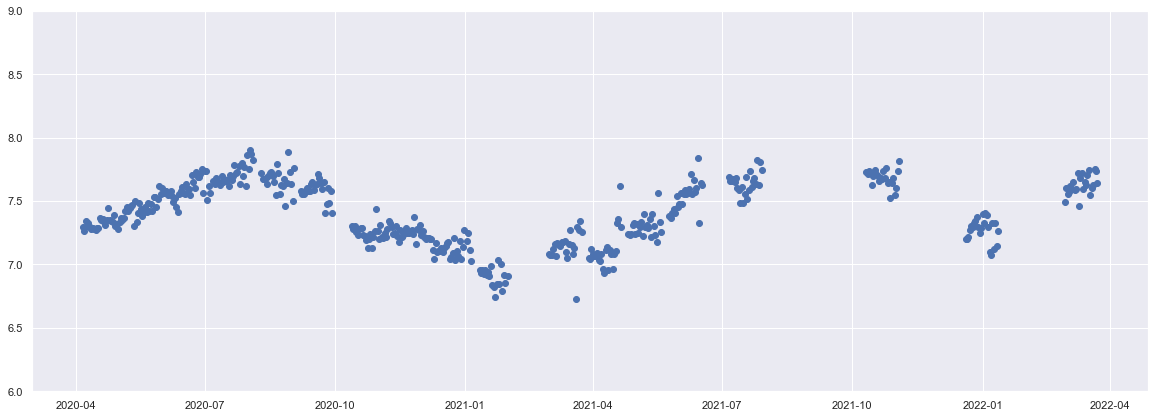

In [31]:
#create outlier
plt.figure(figsize=(20,5))
plt.scatter(df['date'],df['counts_per_day'] )
plt.show()
print(len(df))
#As you can see, the number of people who fill the questionnaire was declined during the time so try to make an outlier to drop the data that are not accurate
# (because the number of people who fill the questionnaire is more than 50 per day and the quality of life is calculated as the average of at least 50 people per day)
df = df[df['counts_per_day'] > 50]
print(len(df))
plt.figure(figsize=(20,7))
plt.scatter(df['date'],df['quality_of_life'])
plt.ylim(6,9)
plt.show()
#You can see, with this outlier I can delete the unrelated point

<AxesSubplot:>

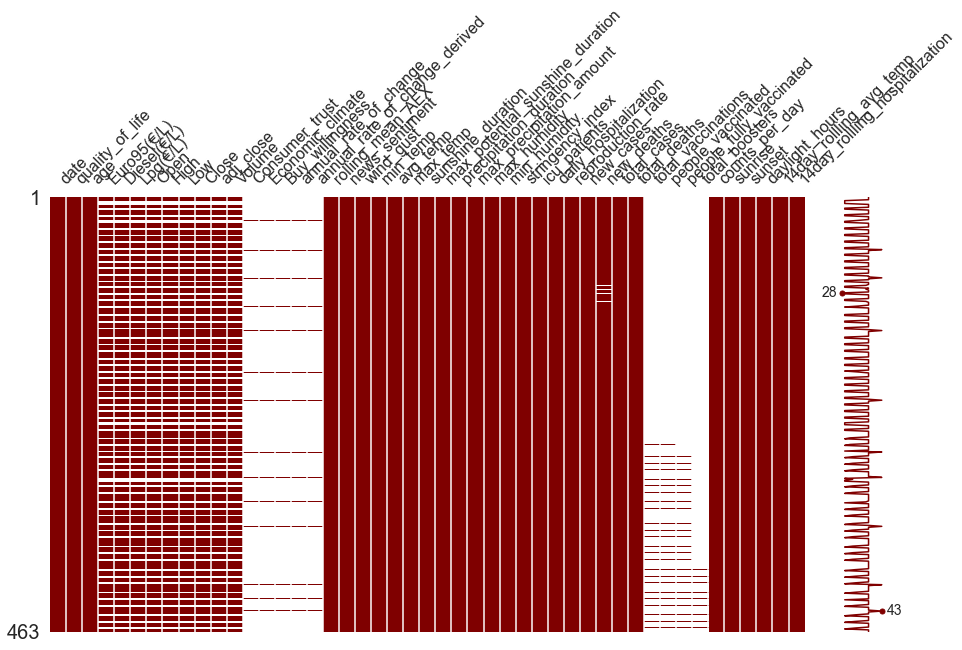

In [32]:
#plot the null data
msno.matrix(df, figsize=(15,8), color=(0.5,0,0))

In [33]:
#check the null data
print(len(df))
print(df.isna().sum())
#drop the columns that have very little information and are not useful
df=df.drop(columns=['Consumer_trust', 'Economic_climate','Buy_willingness', 'annual_rate_of_change','annual_rate_of_change_derived','total_vaccinations', 'people_vaccinated',\
    'people_fully_vaccinated'])
df.head()

463
date                                 0
quality_of_life                      0
age                                  0
Euro95(€/L)                        129
Diesel(€/L)                        129
Lpg(€/L)                           129
Open                               129
High                               129
Low                                129
Close                              129
adj_close                          129
Volume                             129
Consumer_trust                     449
Economic_climate                   449
Buy_willingness                    449
annual_rate_of_change              449
annual_rate_of_change_derived      449
rolling_mean_AEX                     0
news_sentiment                       0
wind_gust                            0
min_temp                             0
avg_temp                             0
max_temp                             0
sunshine_duration                    0
max_potential_sunshine_duration      0
precipitation_duratio

,date,quality_of_life,age,Euro95(€/L),Diesel(€/L),Lpg(€/L),Open,High,Low,Close,...,new_deaths,total_cases,total_deaths,total_boosters,counts_per_day,sunrise,sunset,daylight_hours,14day_rollling_avg_temp,14day_rollling_hospitalization
1,2020-04-06,7.297588,54.378883,1.476,1.239,0.560,486.260010,491.679993,482.690002,489.820007,...,103.0,19617,1873,NaN,7340,6.900000,20.300000,13.400000,10.600000,2859.500000
2,2020-04-07,7.263230,55.309461,1.475,1.238,0.556,503.970001,508.559998,494.109985,499.850006,...,234.0,20589,2107,NaN,9914,6.866667,20.316667,13.450000,10.950000,2810.666667
3,2020-04-08,7.343911,55.432321,1.473,1.237,0.543,496.190002,500.709992,491.489990,500.709992,...,147.0,21802,2254,NaN,7543,6.833333,20.350000,13.516667,11.537500,2824.000000
4,2020-04-09,7.304743,55.732974,1.471,1.238,0.547,506.549988,511.929993,499.049988,508.040008,...,148.0,23140,2402,NaN,6857,6.783333,20.383333,13.600000,11.260000,2805.800000
5,2020-04-10,7.323265,55.054243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,117.0,24463,2519,NaN,4996,6.750000,20.416667,13.666667,10.691667,2784.000000


<AxesSubplot:>

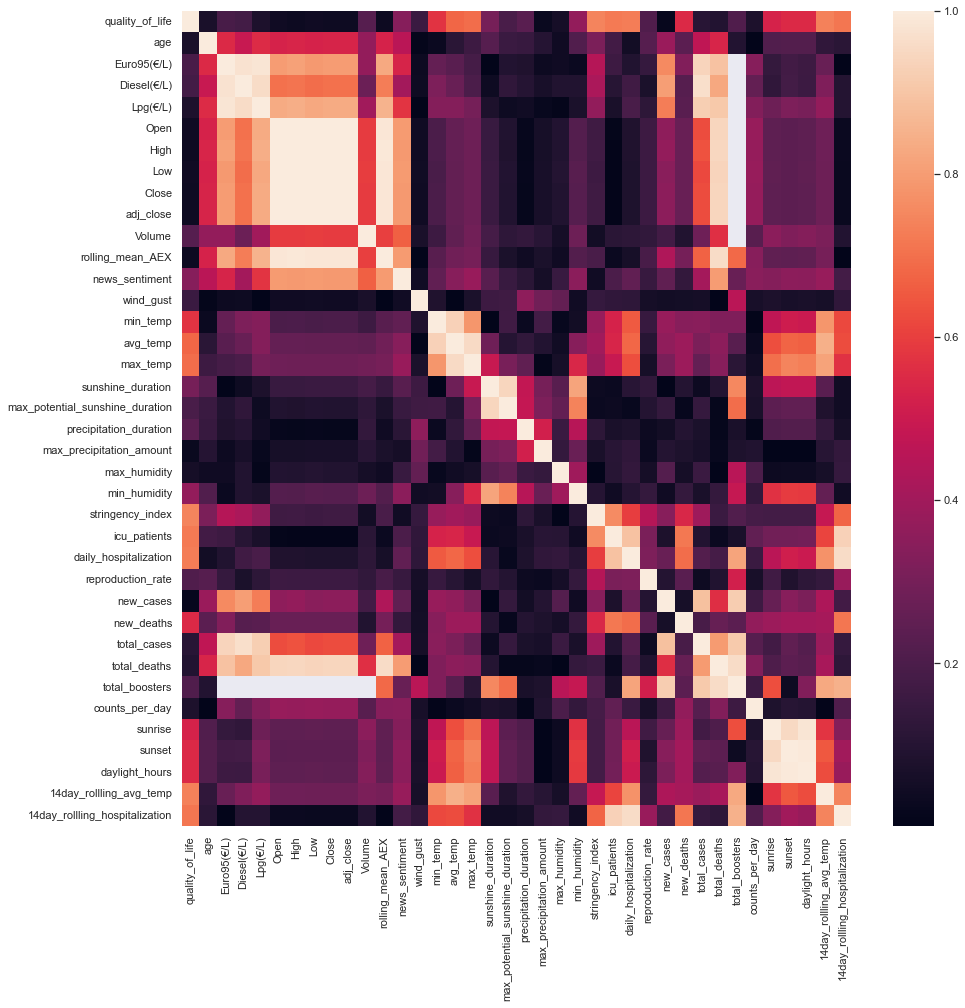

In [34]:
# Using Correlation
import seaborn as sns
cor=df.corr().abs()
sns.set(rc = {'figure.figsize':(15,15)})
sns.heatmap(cor)


In [35]:
#before trying to interpolate other null values, I tried to check if there was any correlation or not so because there is not any good correlation between the quality of life
# and ['Euro95(€/L)','Diesel(€/L)', 'Lpg(€/L)', 'Open', 'High', 'Low', 'Close', 'adj_close','Volume']
#So, there is no need to interpolate those columns. I dropped those and others that have no good correlations.
features=['quality_of_life','avg_temp', 'max_temp','stringency_index', 'icu_patients', 'daily_hospitalization','14day_rollling_avg_temp','14day_rollling_hospitalization']
print(df[features].isna().sum().sum()) # check again if there is any nan value
df.head()

0


,date,quality_of_life,age,Euro95(€/L),Diesel(€/L),Lpg(€/L),Open,High,Low,Close,...,new_deaths,total_cases,total_deaths,total_boosters,counts_per_day,sunrise,sunset,daylight_hours,14day_rollling_avg_temp,14day_rollling_hospitalization
1,2020-04-06,7.297588,54.378883,1.476,1.239,0.560,486.260010,491.679993,482.690002,489.820007,...,103.0,19617,1873,NaN,7340,6.900000,20.300000,13.400000,10.600000,2859.500000
2,2020-04-07,7.263230,55.309461,1.475,1.238,0.556,503.970001,508.559998,494.109985,499.850006,...,234.0,20589,2107,NaN,9914,6.866667,20.316667,13.450000,10.950000,2810.666667
3,2020-04-08,7.343911,55.432321,1.473,1.237,0.543,496.190002,500.709992,491.489990,500.709992,...,147.0,21802,2254,NaN,7543,6.833333,20.350000,13.516667,11.537500,2824.000000
4,2020-04-09,7.304743,55.732974,1.471,1.238,0.547,506.549988,511.929993,499.049988,508.040008,...,148.0,23140,2402,NaN,6857,6.783333,20.383333,13.600000,11.260000,2805.800000
5,2020-04-10,7.323265,55.054243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,117.0,24463,2519,NaN,4996,6.750000,20.416667,13.666667,10.691667,2784.000000


In [36]:
#check the skew data
skew_columns = (df[features].skew().sort_values(ascending=False))
skew_columns = skew_columns.loc[skew_columns > 0.75]
skew_columns

Series([], dtype: float64)

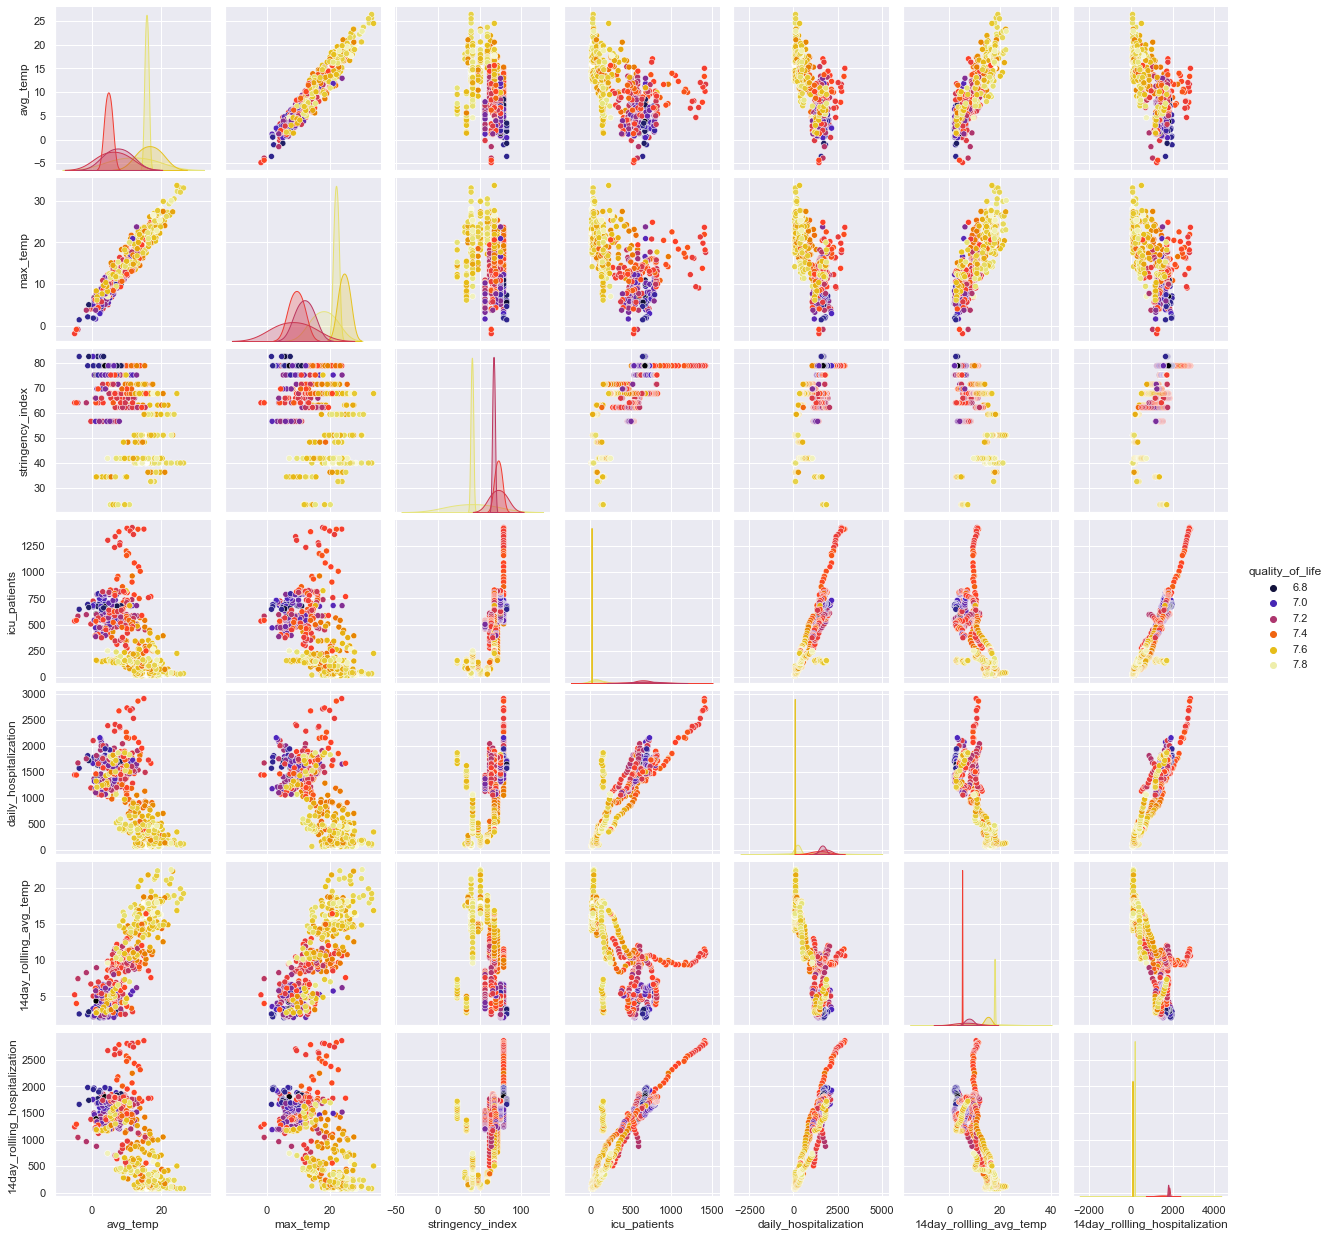

In [37]:
#make a pairplot
sns.pairplot(data=df[features], hue='quality_of_life', palette='CMRmap')

In [38]:
#Correlation of features with the output variable
cor_target = cor["quality_of_life"]
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.6] 
relevant_features


quality_of_life                   1.000000
avg_temp                          0.676583
max_temp                          0.694319
stringency_index                  0.744872
icu_patients                      0.720177
daily_hospitalization             0.726907
14day_rollling_avg_temp           0.737582
14day_rollling_hospitalization    0.713093
Name: quality_of_life, dtype: float64

In [39]:
#final feature selection
#as you can see in the pair plot, there is a strong correlation between avg_temp, max_temp, and 14day_rollling_avg_temp, 
# therefore I selected the 14days rolling average because it has a better correlation with the quality of life rather than others.
#and between icu_patients, daily_hospitalization, and 14day_rollling_hospitalization, so I selected daily hospitalization because it has a better correlation rather than others

# Create the X-matrix and the y-vector.
final_feature=['14day_rollling_avg_temp','daily_hospitalization','stringency_index']
y = df['quality_of_life'].values  #Target Variable
X = df[final_feature].values.reshape(-1, len(final_feature)) #Feature Matrix
X.shape

(463, 3)

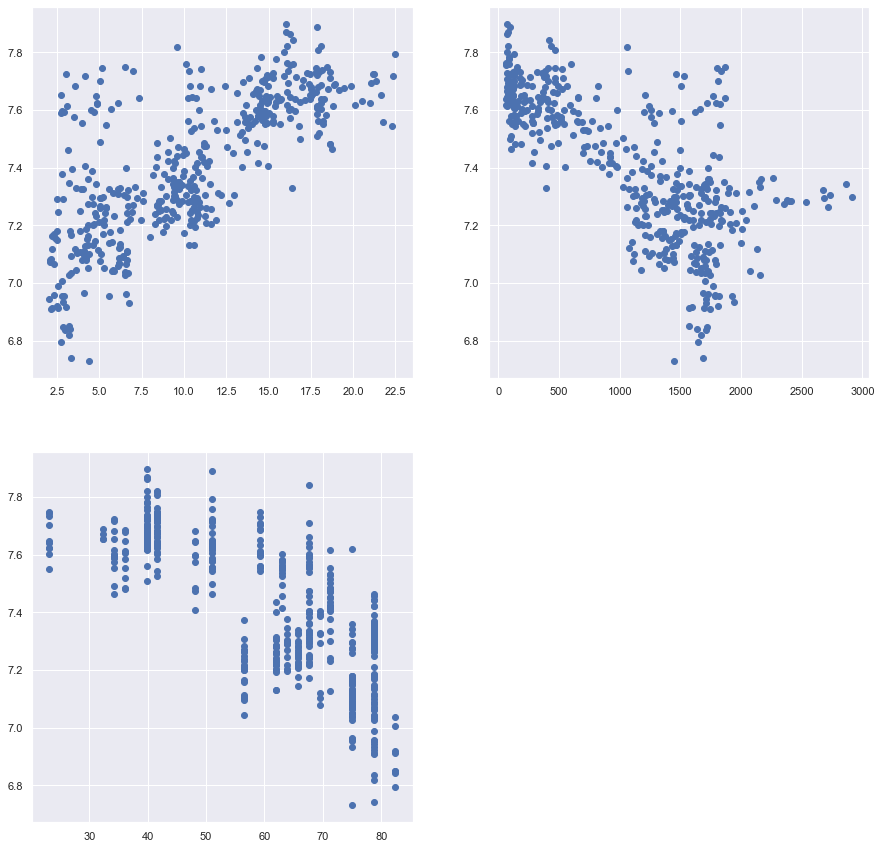

In [40]:
#scatter plots of three important features and quality of life
plt.subplot(2,2,1)
plt.scatter(df['14day_rollling_avg_temp'],df['quality_of_life'])
plt.subplot(2,2,2)
plt.scatter(df['daily_hospitalization'],df['quality_of_life'])
plt.subplot(2,2,3)
plt.scatter(df['stringency_index'],df['quality_of_life'])


In [41]:
#check the variance to normalization
std=np.std(X,axis=0)
print(std.min(),std.max())
#So we need to normalize the data not only for much variance but also for different measurement bases of columns.
#normalization
def normalize(X):
     scalar = StandardScaler()
     X = scalar.fit_transform(X)
     return X

X = normalize(X)

5.253647457767895 691.7618168985629


In [42]:
def plot_learning_curves(model, X_train, y_train, X_val, y_val):
    """
    input:
        model:pipeline object
        X_train, y_train: training data
        X_val, y_val: test data
    """
    train_errors, val_errors = [], []
    for m in range(30, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.figure(figsize=(8,5))
    plt.plot(np.sqrt(train_errors), "r-.", linewidth=1, label="training data")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=1, label="validation data")
    plt.legend(loc="upper right", fontsize=10)   
    plt.xlabel("Training set size", fontsize=10) 
    plt.ylabel("RMSE", fontsize=10)     
    # compare accuracy train versus test to access overfit 
    print(f'test  acc: {model.score(X_val, y_val)}')
    print(f'train acc: {model.score(X_train, y_train)}')

In [43]:
#Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("train and test data are split:")
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

train and test data are split:
(370, 3) (370,)
(93, 3) (93,)


Intercept:  7.404779257872782
Coefficients:  [ 0.09848538 -0.03387205 -0.1146089 ]
lin_reg_rmse :  0.11778688379496632
Linear Regression Accuracy:  0.7304848852103267
test  acc: 0.730450684915112
train acc: 0.7467571036878815


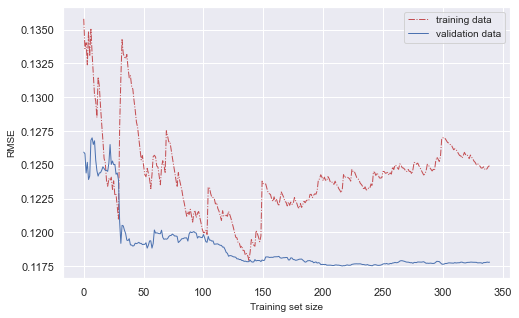

In [44]:
#---Linear Regression-----------------------------------------
line_reg=LinearRegression()
line_reg.fit(X_train,y_train)
print('Intercept: ', line_reg.intercept_)
print('Coefficients: ', line_reg.coef_)

#Predicting the y_value of linear regression
lin_reg_y_predicted = line_reg.predict(X_test)

#calculating the rmse 
lin_reg_rmse = np.sqrt(mean_squared_error(y_test, lin_reg_y_predicted))
print('lin_reg_rmse : ', lin_reg_rmse)

#Linear Regression Accuracy with test set
lin_reg_acc = r2_score(y_test, lin_reg_y_predicted)
print('Linear Regression Accuracy: ',lin_reg_acc)
plot_learning_curves(line_reg, X_train, y_train, X_test, y_test)

Intercept:  -392799626554.5432
Coefficients:  [ 3.92799627e+11  1.22850497e-01 -1.70943518e-01  4.82765596e-02
 -6.74686126e-02 -1.73258174e-01  2.60834071e-02 -4.97958270e-02
 -5.02867856e-02  1.95476673e-01 -6.23772755e-03  1.48625719e-01
 -1.22974785e-01  1.15941371e-01 -1.51162658e-01  6.42529076e-02
  1.61164801e-01 -1.82519057e-01  4.11452374e-02 -4.18019097e-02
  4.90328063e-02  1.89387352e-01 -8.77696272e-02  2.14683447e-01
 -1.62915255e-01  4.04029875e-02 -9.12511737e-02  7.97450234e-02
  1.73141665e-01 -1.97743906e-03 -6.01307679e-02  8.55815293e-02
  3.98379579e-03  1.10936783e-02 -3.11568454e-02]
Polynomial_Regression_reg_rmse :  0.08717191628897501
Plynomial Regression Accuracy:  0.8523809357268349
test  acc: 0.8516835311276084
train acc: 0.868158554253071


(-5.0, 5.0)

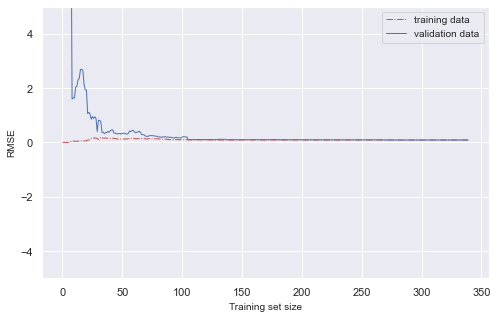

In [45]:
#---Polynomial Linear regression-----------------------------
poly_reg=PolynomialFeatures(degree=4)
X_poly_train,X_poly_test =poly_reg.fit_transform(X_train),poly_reg.fit_transform(X_test)

poly_reg_model = LinearRegression()
poly_reg_model.fit(X_poly_train, y_train)
print('Intercept: ', poly_reg_model.intercept_)
print('Coefficients: ', poly_reg_model.coef_)

#Predicting the y_value of polynomial linear regression
poly_reg_y_predicted = poly_reg_model.predict(X_poly_test)

#calculating the rmse 
poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))
print('Polynomial_Regression_reg_rmse : ', poly_reg_rmse)

#Plynomial Regression Accuracy with test set
poly_reg_acc = r2_score(y_test, poly_reg_y_predicted)
print('Plynomial Regression Accuracy: ',poly_reg_acc)
plot_learning_curves(poly_reg_model, X_poly_train, y_train, X_poly_test, y_test)
plt.ylim(-5,5)

random_forest_reg_rmse :  0.08627635776643433
Random Forest Regression Accuracy:  0.8553984769769011
test  acc: 0.8548920328192477
train acc: 0.982454848668279


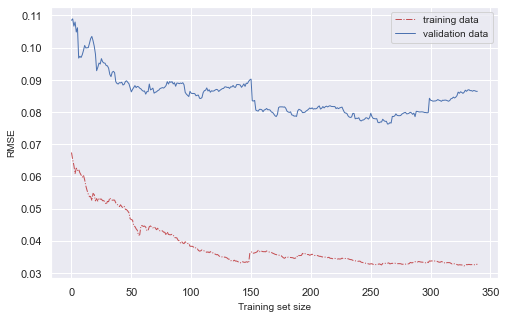

In [46]:
#---Random forest regression------------------------------------
rf_reg = RandomForestRegressor(n_estimators=200, random_state=0 )
rf_reg.fit(X_train,y_train)

#Predicting the y_value of random forest
rf_reg_y_predicted= rf_reg.predict(X_test)

#calculating the rmse 
rf_reg_rmse = np.sqrt(mean_squared_error(y_test, rf_reg_y_predicted))
print('random_forest_reg_rmse : ', rf_reg_rmse)

#Random Forest Regression Accuracy with test set
rf_reg_acc = r2_score(y_test, rf_reg_y_predicted)
print('Random Forest Regression Accuracy: ',rf_reg_acc)
plot_learning_curves(rf_reg, X_train, y_train, X_test, y_test)

Due to the accuracy of the three models, the results accuracy of Polynomial linear regression and random forest are very close to each other.
So, I tried repeating those two models with the different random states to check the accuracy and rmse

In [47]:
#function of Polynomial Linear regression
def poly_reg(degree,random_state):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    poly_reg=PolynomialFeatures(degree=degree)
    X_poly_train,X_poly_test =poly_reg.fit_transform(X_train),poly_reg.fit_transform(X_test)
    poly_reg_model = LinearRegression()
    poly_reg_model.fit(X_poly_train, y_train)
    poly_reg_y_predicted = poly_reg_model.predict(X_poly_test)
    poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))
    print('Polynomial_Regression_reg_rmse : ', poly_reg_rmse)
    poly_reg_acc = r2_score(y_test, poly_reg_y_predicted)
    print('Plynomial Regression Accuracy: ',poly_reg_acc)


In [48]:
#check the accuracy and rmse with different degree of polynomial regression
for i in [1,2,3,4,5,6]:
    poly_reg(degree=i,random_state=42)
# we can see that the best degree is 4

Polynomial_Regression_reg_rmse :  0.11778688379496631
Plynomial Regression Accuracy:  0.7304848852103267
Polynomial_Regression_reg_rmse :  0.0945071494292994
Plynomial Regression Accuracy:  0.8264923651626224
Polynomial_Regression_reg_rmse :  0.095160597538793
Plynomial Regression Accuracy:  0.824084712395211
Polynomial_Regression_reg_rmse :  0.08717191628897501
Plynomial Regression Accuracy:  0.8523809357268349
Polynomial_Regression_reg_rmse :  0.13270293957448967
Plynomial Regression Accuracy:  0.6579021471634353
Polynomial_Regression_reg_rmse :  0.13138031438420775
Plynomial Regression Accuracy:  0.6646874137340515


In [49]:
#check the different accuracy and rsme with different randome satate of polynomial regression
for i in [10,20,30,40,50,60]:
    poly_reg(degree=4,random_state=i)

Polynomial_Regression_reg_rmse :  0.1469922665585638
Plynomial Regression Accuracy:  0.6385300556486996
Polynomial_Regression_reg_rmse :  0.09961994606637094
Plynomial Regression Accuracy:  0.8283657969875488
Polynomial_Regression_reg_rmse :  0.09582412328633107
Plynomial Regression Accuracy:  0.8546600873583988
Polynomial_Regression_reg_rmse :  0.10457774438256424
Plynomial Regression Accuracy:  0.7852677293716399
Polynomial_Regression_reg_rmse :  0.0966111639201108
Plynomial Regression Accuracy:  0.858285159534985
Polynomial_Regression_reg_rmse :  0.09834706755009877
Plynomial Regression Accuracy:  0.839941809857154


In [50]:
#function of random forest model
def random_forest(r_state):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=r_state)
    rf_reg = RandomForestRegressor(n_estimators=200, random_state=0 )
    rf_reg.fit(X_train,y_train)
    rf_reg_y_predicted= rf_reg.predict(X_test)
    rf_reg_rmse = np.sqrt(mean_squared_error(y_test, rf_reg_y_predicted))
    print('random_forest_reg_rmse : ', rf_reg_rmse)
    rf_reg_acc = r2_score(y_test, rf_reg_y_predicted)
    print('Random Forest Regression Accuracy: ',rf_reg_acc)
   

In [51]:
#check different accuracy with repeating the random forest model
for i in [10,20,30,40,50,60]:
    random_forest(r_state=i)

random_forest_reg_rmse :  0.07553490889230297
Random Forest Regression Accuracy:  0.9045494053217116
random_forest_reg_rmse :  0.09522658321058004
Random Forest Regression Accuracy:  0.8431705436902288
random_forest_reg_rmse :  0.09391229133533659
Random Forest Regression Accuracy:  0.8604017224931368
random_forest_reg_rmse :  0.09000787009026613
Random Forest Regression Accuracy:  0.8409331263474255
random_forest_reg_rmse :  0.08952374673286492
Random Forest Regression Accuracy:  0.8783149560011871
random_forest_reg_rmse :  0.09128613480334584
Random Forest Regression Accuracy:  0.8620998592438405


As a result, although the polynomial linear regression has a better accuracy between train and test(as you can see in the curve plot), the random forest model has the better accuracy during repetition and it is not under 84%(sometimes 90%), Also we can see during the repetition the rmse is not more than 1%, so I think the random forest is better for modeling rather than others.